In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statistics as stats
from datetime import datetime

In [215]:
from pandas_datareader import data
import time

In [216]:
import sys 
print (sys.version) 

3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [217]:
pd.set_option("display.precision", 3)

In [218]:
df2018 = pd.read_csv("ks-projects-201801.csv", parse_dates=True, infer_datetime_format=True, 
                  usecols=["ID", "name", "category", "main_category", "currency", "deadline", "goal", "launched"
                          , "pledged", "state", "backers", "country"])
df2018["Date"] = "January 2018"

In [219]:
#df2016 = pd.read_csv("ks-projects-201612.csv", engine='python', parse_dates=True, infer_datetime_format=True, 
#                  usecols=[0,1,2,3,4,5,6,7,8,9,10,11], header=None, skiprows=1, 
#                      names=['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
#       'goal', 'launched', 'pledged', 'state', 'backers', 'country'])
df2016 = pd.read_csv("ks-projects-201612.csv", engine='python', parse_dates=True, infer_datetime_format=True)
df2016["Date"] = "December 2016"

In [220]:
print(df2018.shape)
print("\n")
print(df2016.shape)

(378661, 13)


(323750, 18)


In [221]:
df2016.columns

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Date'],
      dtype='object')

In [222]:
#Renaming DF2016 columns to remove the extra space and giving proper names to the Unnamed columns

df2016.rename(columns={'ID ': 'ID', 'name ': 'name', 'category ': 'category', 'main_category ': 'main_category',
                      'currency ': 'currency', 'deadline ': 'deadline', 'goal ': 'goal', 'launched ': 'launched', 
                      'pledged ': 'pledged', 'state ': 'state', 'backers ': 'backers', 'country ': 'country', 
                      'usd_pledged ': 'usd_pledged', 'Unnamed: 13':'E1', 'Unnamed: 14': 'E2', 
                      'Unnamed: 15': 'E3', 'Unnamed: 16':'E4'}, inplace=True)

In [223]:
#Looking up for rows where E1 <> NULL, and concatenating Name and Category for those rows

df2016.loc[df2016['E1'].notna(), ['name']] = df2016["name"] + df2016["category"]


In [224]:
df2016_copy = df2016

In [225]:
df2016[df2016["E1"].notna()].shape

(625, 18)

In [226]:
list2 = df2016.columns.drop(['ID', 'name']).tolist()
list2

['category',
 'main_category',
 'currency',
 'deadline',
 'goal',
 'launched',
 'pledged',
 'state',
 'backers',
 'country',
 'usd pledged ',
 'E1',
 'E2',
 'E3',
 'E4',
 'Date']

In [227]:
# For all the rows where E1 <> NULL --> shift the values leftwards, for all columns in [Category:Date] range

for i in range(0, len(list2)-1):
    df2016.loc[df2016["E1"].notna(), list2[i]] = df2016.loc[df2016["E1"].notna(), list2[i+1]]

In [228]:
df2016[df2016["E1"].notna()].shape

(12, 18)

In [229]:
df2016.state.unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended', '20', '0', '26', '7470', '3280',
       '2012-06-06 23:54:14', '1', '6323', '2015-07-03 18:23:23', '2503',
       '435', '401', '2014-02-05 02:06:20', '750', '88619.2'],
      dtype=object)

In [230]:
df2016_copy = df2016

In [231]:
# Getting a list of all "garbage" values of "state" --> these would be the rows to be deleted

list3 = df2016.state.unique().tolist()
len(list3)
list3 = list3[6:]
list3

['20',
 '0',
 '26',
 '7470',
 '3280',
 '2012-06-06 23:54:14',
 '1',
 '6323',
 '2015-07-03 18:23:23',
 '2503',
 '435',
 '401',
 '2014-02-05 02:06:20',
 '750',
 '88619.2']

In [232]:
# Deleting the aforementioned rows that contain a garbage value for "State"

df2016 = df2016.drop(df2016[df2016["state"].isin(list3)].index)

In [233]:
df2016["goal"] = pd.to_numeric(df2016["goal"])
df2016["pledged"] = pd.to_numeric(df2016["pledged"])
df2016["backers"] = pd.to_numeric(df2016["backers"])

In [234]:
df_fulldata = pd.concat([df2018, df2016], keys='ID', ignore_index=True, sort=True)

In [235]:
df_fulldata.columns

Index(['Date', 'E1', 'E2', 'E3', 'E4', 'ID', 'backers', 'category', 'country',
       'currency', 'deadline', 'goal', 'launched', 'main_category', 'name',
       'pledged', 'state', 'usd pledged '],
      dtype='object')

In [236]:
print(df_fulldata.E4.unique())

[nan]


In [237]:
df_fulldata = df_fulldata.drop(["E1", "E2", "E3", "E4"], axis=1)

In [238]:
df_fulldata.columns

Index(['Date', 'ID', 'backers', 'category', 'country', 'currency', 'deadline',
       'goal', 'launched', 'main_category', 'name', 'pledged', 'state',
       'usd pledged '],
      dtype='object')

In [239]:
#print(df.loc[df['A'] == 'foo'])

df_fulldata.loc[df_fulldata['ID'] == 1495637387]

,Date,ID,backers,category,country,currency,deadline,goal,launched,main_category,name,pledged,state,usd pledged
97593,January 2018,1495637387,4,Documentary,US,USD,2011-05-16,7777.0,2011-03-15 03:08:19,Film & Video,From Lashes to Liberty; The Power of a Photograph,255.0,failed,NaN
462131,December 2016,1495637387,4,Documentary,US,USD,2011-05-16 03:58:00,7777.0,2011-03-15 03:08:19,Film & Video,From Lashes to Liberty The Power of a Photograph,255.0,failed,255


In [240]:
#Converting the two Date columns to the date format

df_fulldata.deadline = pd.to_datetime(df_fulldata.deadline, format='%Y-%m-%d')
df_fulldata.launched = pd.to_datetime(df_fulldata.launched, format='%Y-%m-%d')

In [241]:
#Measuring the project duration - need only the "number of days"

df_fulldata['duration'] = (df_fulldata.deadline - df_fulldata.launched).dt.days

In [242]:
df_fulldata.head()

,Date,ID,backers,category,country,currency,deadline,goal,launched,main_category,name,pledged,state,usd pledged,duration
0,January 2018,1000002330,0,Poetry,GB,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,Publishing,The Songs of Adelaide & Abullah,0.0,failed,NaN,58
1,January 2018,1000003930,15,Narrative Film,US,USD,2017-11-01,30000.0,2017-09-02 04:43:57,Film & Video,Greeting From Earth: ZGAC Arts Capsule For ET,2421.0,failed,NaN,59
2,January 2018,1000004038,3,Narrative Film,US,USD,2013-02-26,45000.0,2013-01-12 00:20:50,Film & Video,Where is Hank?,220.0,failed,NaN,44
3,January 2018,1000007540,1,Music,US,USD,2012-04-16,5000.0,2012-03-17 03:24:11,Music,ToshiCapital Rekordz Needs Help to Complete Album,1.0,failed,NaN,29
4,January 2018,1000011046,14,Film & Video,US,USD,2015-08-29,19500.0,2015-07-04 08:35:03,Film & Video,Community Film Project: The Art of Neighborhoo...,1283.0,canceled,NaN,55


In [243]:
list_currency = df_fulldata.currency.unique().tolist()
list_forex = []

In [244]:
# list_forex = <<Get forex rates using DataReader for the list_currency members>>
counter = 0
list_forex.clear()
for members in list_currency:
    rate = data.DataReader(members+"/USD", data_source="av-forex", access_key='X3ELXPQMHTY9BQ7E')
    list_forex.append(rate.iloc[4][0])       
    #print(rate.iloc[4])
    counter = counter+1
    if counter == 5:
        counter = 0
        time.sleep(60)
        
# "rate" is the Dataframe returned by DataReader() with all the exchange variables - the headers are the indices
# and the actual values are in a single column denoted by name - <<currency_x>>/USD 
#rate.iloc[4] refers to "Exchange Rate" in the Dataframe "rate", which is returned as a Series with just 1 element
#rate.iloc[4][0] points to the first element in the series, which is the actual float value of the Exchange rate
#time.sleep(60) is used to pause for 1 minute, as the free api_key for DataReader - "av-forex" only allows 5 API
# requests per minute

In [245]:
#Creating Dataframe from 2 lists - Method 1 - Using list(zip(list1, list2)) method

data_forex_rates = pd.DataFrame(list(zip(list_currency, list_forex)), columns=["Curr", "Rate"])
data_forex_rates.rename({"Curr":"currency"}, axis=1, inplace=True)
data_forex_rates.head()

,currency,Rate
0,GBP,1.35152000
1,USD,1.00000000
2,CAD,0.78190000
3,AUD,0.76230000
4,NOK,0.11658000


In [246]:
#Alternative method to create DataFrame from 2 lists

data_dict = {"Curr": list_currency, "Rates":list_forex}   #Define Data Dictionary
data_forex_rates2 = pd.DataFrame(data_dict, columns=["Curr", "Rates"])  #Create DataFrame from the data_dict
data_forex_rates2.head()

,Curr,Rates
0,GBP,1.35152000
1,USD,1.00000000
2,CAD,0.78190000
3,AUD,0.76230000
4,NOK,0.11658000


In [247]:
#count_of_states = df1[['state', 'name']].groupby(['state']).count()
#count_of_categories = df1[['category', 'name']].groupby(['category']).count()
#count_of_maincategory = df1[['main_category', 'name']].groupby(['main_category']).count()

In [248]:
df_fulldata["backers"] = pd.to_numeric(df_fulldata["backers"])

In [249]:
avg_backers_by_state = df_fulldata[["state", "backers"]].groupby(["state"]).mean()
avg_backers_by_state

,backers
state,
canceled,25.607
failed,16.577
live,75.499
successful,259.113
suspended,108.984
undefined,0.000


In [250]:
df_fulldata.loc[df_fulldata["country"]=="N,\"0"]

,Date,ID,backers,category,country,currency,deadline,goal,launched,main_category,name,pledged,state,usd pledged,duration
378811,December 2016,1000694855,0,Film & Video,"N,""0",USD,2014-09-20 06:59:00,6500.0,2014-08-06 21:28:36,Film & Video,STREETFIGHTERZ WHEELIE MURICA,555.00,undefined,NaN,44
378948,December 2016,100149523,0,Music,"N,""0",AUD,2015-08-25 23:00:00,4500.0,2015-08-04 12:05:17,Music,Duncan Woods - Chameleon EP,4767.00,undefined,NaN,21
379210,December 2016,1003023003,0,Music,"N,""0",USD,2015-04-09 21:06:13,3500.0,2015-03-10 20:06:13,Music,The Making of Ashley Kelley's Debut Album,3576.00,undefined,NaN,30
379222,December 2016,1003130892,0,Music,"N,""0",USD,2015-11-26 10:59:00,6000.0,2015-11-02 22:09:19,Music,Butter Side Down Debut Album,7007.80,undefined,NaN,23
379311,December 2016,1003629045,0,Music,"N,""0",USD,2016-03-21 06:00:00,3000.0,2016-02-23 03:09:49,Music,Chase Goehring debut EP,3660.38,undefined,NaN,27
379375,December 2016,1004013077,0,Music,"N,""0",CAD,2014-10-10 22:51:01,4000.0,2014-09-10 22:51:01,Music,Spencer Capier Instrumental Project 2015,4760.00,undefined,NaN,30
379391,December 2016,1004126342,0,Music,"N,""0",USD,2015-06-11 04:00:00,5000.0,2015-05-15 02:12:35,Music,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,6370.00,undefined,NaN,27
379408,December 2016,1004255433,0,Film & Video,"N,""0",USD,2015-11-07 08:59:00,6000.0,2015-10-10 18:45:24,Film & Video,The Battle For Breukelen: A Neighborhood Epic,6695.00,undefined,NaN,27
379412,December 2016,1004298993,0,Music,"N,""0",USD,2015-03-28 18:28:27,2750.0,2015-02-11 19:28:27,Music,"""Tamboura Plays Violin"" - a collection of Pop ...",2926.00,undefined,NaN,44
379426,December 2016,1004402863,0,Music,"N,""0",USD,2015-12-11 21:02:55,1200.0,2015-11-11 21:02:55,Music,Nightingale Noel - An A Cappella Holiday CD,1585.00,undefined,NaN,30


In [251]:
df_fulldata.drop(df_fulldata[df_fulldata["country"] == "N,\"0"].index, inplace=True)

In [252]:
#Looking at the state distribution of projects by Category

grouping1 = df_fulldata.groupby(["state", "country"], as_index=False)["backers"].mean()
grouping1.head()

,state,country,backers
0,canceled,AT,21.316
1,canceled,AU,19.528
2,canceled,BE,12.895
3,canceled,CA,23.885
4,canceled,CH,25.643


In [253]:
grouping2 = df_fulldata[["state", "main_category", "backers"]].groupby(["state", "main_category"])["backers"].mean()
grouping2.head()

state     main_category
canceled  Art               7.167
          Comics           18.778
          Crafts            7.087
          Dance             6.233
          Design           42.398
Name: backers, dtype: float64

In [254]:
#survivors = df2[['Survived', 'Pclass', 'Sex', 'Traveling']].groupby(['Pclass', 'Sex', 'Traveling']).mean()


grouping3 = df_fulldata[["main_category","country","state"]].groupby(["main_category", "country"]).count()
grouping3.head(5)


state
main_category country       
Art           AT          57
              AU         745
              BE          75
              CA        1945
              CH          79

In [255]:
left_join1 = pd.merge(df_fulldata, data_forex_rates, on="currency", how="inner")

In [256]:
df_fulldata.loc[df_fulldata["ID"]==1000002330]

,Date,ID,backers,category,country,currency,deadline,goal,launched,main_category,name,pledged,state,usd pledged,duration
0,January 2018,1000002330,0,Poetry,GB,GBP,2015-10-09 00:00:00,1000.0,2015-08-11 12:12:28,Publishing,The Songs of Adelaide & Abullah,0.0,failed,NaN,58
378661,December 2016,1000002330,0,Poetry,GB,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,Publishing,The Songs of Adelaide & Abullah,0.0,failed,0,58


In [257]:
df_fulldata.loc[(df_fulldata["backers"]==0) & (df_fulldata["state"]=="successful")]

,Date,ID,backers,category,country,currency,deadline,goal,launched,main_category,name,pledged,state,usd pledged,duration
2457,January 2018,1012744036,0,Music,"N,0""",USD,2016-05-26,5000.0,2016-04-26 19:46:26,Music,An Oratorio for our Time - Last Stop Cafe,5.170e+03,successful,NaN,29
4892,January 2018,1024989802,0,Music,"N,0""",USD,2016-05-11,5000.0,2016-04-11 19:29:17,Music,Jackson Ruby: The Cassette Album,5.296e+03,successful,NaN,29
5353,January 2018,1027275369,0,Music,"N,0""",USD,2016-05-21,3800.0,2016-04-21 16:14:28,Music,Help Parker Brown make his first solo album,5.077e+03,successful,NaN,29
5597,January 2018,1028691308,0,Music,"N,0""",USD,2016-05-08,3500.0,2016-04-04 23:32:00,Music,Help BETHANY record a NEW single in Nash!,3.502e+03,successful,NaN,33
8260,January 2018,1041708793,0,Music,"N,0""",USD,2016-05-01,3500.0,2016-03-25 17:20:21,Music,Serena Gabriel's first CD!!!!!!: Diving Deep,3.787e+03,successful,NaN,36
13001,January 2018,1065249597,0,Hardware,"N,0""",USD,2014-06-15,200000.0,2014-04-29 17:18:03,Technology,SCiO: Your Sixth Sense. A Pocket Molecular Sen...,2.763e+06,successful,NaN,46
13048,January 2018,1065509232,0,Music,"N,0""",GBP,2016-05-12,3500.0,2016-04-11 12:42:02,Music,LUME Festival 2016,3.606e+03,successful,NaN,30
14527,January 2018,1073104639,0,Music,"N,0""",CAD,2016-05-04,4000.0,2016-03-25 16:56:43,Music,SUNN - EP - Pre-vente,4.051e+03,successful,NaN,39
16769,January 2018,1084993156,0,Music,"N,0""",USD,2013-04-09,3750.0,2013-03-26 05:06:11,Music,"Willy Tea, Chris Doud and Chums: The Children'...",4.593e+03,successful,NaN,13
21385,January 2018,110837091,0,Music,"N,0""",USD,2016-05-07,8000.0,2016-03-28 20:38:22,Music,Nathan Menard,8.263e+03,successful,NaN,39


In [258]:
left_join1.loc[left_join1["ID"]==1379649454]

,Date,ID,backers,category,country,currency,deadline,goal,launched,main_category,name,pledged,state,usd pledged,duration,Rate
119804,January 2018,1379649454,0,Music,"N,0""",USD,2013-04-11,5000.0,2013-03-02 15:50:25,Music,"Juiette Z. Payne presents debut EP ""Eternal Da...",5250.0,successful,NaN,39,1.00000000


In [259]:
left_join1.iloc[120263,11] - left_join1.iloc[120263,7]

-2984.0

In [260]:
left_join1["size"] = ''

In [261]:
#Sort the dataframe based on data, to set stage for the drop_duplicates() later
left_join1.sort_values("Date", inplace = True)

In [262]:
#Drop duplicate rows based on ID, and keep the last row of the duplicates - the one from January 2018
left_join2 = left_join1.drop_duplicates(subset="ID", keep="last")

In [263]:
left_join2.loc[left_join2["ID"]==1379649454]

,Date,ID,backers,category,country,currency,deadline,goal,launched,main_category,name,pledged,state,usd pledged,duration,Rate,size
119804,January 2018,1379649454,0,Music,"N,0""",USD,2013-04-11,5000.0,2013-03-02 15:50:25,Music,"Juiette Z. Payne presents debut EP ""Eternal Da...",5250.0,successful,NaN,39,1.00000000,


In [264]:
df = left_join2.copy()
del left_join2

In [265]:
df["goal"] = pd.to_numeric(df["goal"])
#df.goal.astype("float", inplace=True)

In [266]:
df.loc[df['goal']<1000, 'size'] = "small"


In [267]:
df.loc[df["goal"]<1000]

,Date,ID,backers,category,country,currency,deadline,goal,launched,main_category,name,pledged,state,usd pledged,duration,Rate,size
620617,January 2018,1694616421,45,Video Games,CA,CAD,2015-11-27,100.0,2015-10-28 20:35:16,Games,Major\Minor,711.0,successful,NaN,29,0.78190000,small
620624,January 2018,1695417098,4,Comics,CA,CAD,2015-07-01,750.0,2015-06-01 23:25:50,Comics,The Cunning Conjurer,160.0,failed,NaN,29,0.78190000,small
620625,January 2018,1696089599,1,Art,CA,CAD,2017-03-09,750.0,2017-02-07 04:26:44,Art,A Visual Culture: a monthly art subscription,35.0,canceled,NaN,29,0.78190000,small
620659,January 2018,1700357678,0,Apparel,CA,CAD,2015-04-05,500.0,2015-03-06 06:42:32,Fashion,Future Skeleton,0.0,failed,NaN,29,0.78190000,small
620673,January 2018,170152217,1,Graphic Design,CA,CAD,2014-08-14,30.0,2014-07-15 00:31:40,Design,Tee Shirt Design,42.0,successful,NaN,29,0.78190000,small
620680,January 2018,1702218630,1,Nature,CA,CAD,2016-04-04,800.0,2016-03-05 00:02:29,Photography,Capturing Iceland (Canceled),20.0,canceled,NaN,29,0.78190000,small
620635,January 2018,1697695514,39,Poetry,CA,CAD,2016-12-04,750.0,2016-10-25 09:24:44,Publishing,Heal & Conquer Poetry Chapter Book!,1495.0,successful,NaN,39,0.78190000,small
620639,January 2018,1698051460,45,Illustration,CA,CAD,2018-01-11,200.0,2017-12-22 22:32:33,Art,5$ Artwork,1613.0,live,NaN,19,0.78190000,small
620655,January 2018,170021608,0,Jewelry,CA,CAD,2016-04-01,500.0,2016-03-07 18:48:42,Fashion,Mother's Day! EXCLUSIVE EDITION Morse Secret C...,0.0,failed,NaN,24,0.78190000,small
620647,January 2018,1698670816,5,Publishing,CA,CAD,2017-12-18,100.0,2017-11-18 21:42:44,Publishing,2018 BUDGET Passion Planner 172 PRINTABLE page...,29.0,failed,NaN,29,0.78190000,small


In [268]:
df.drop(["name", "usd pledged "], axis=1, inplace=True)

In [269]:
df.pledged = pd.to_numeric(df.pledged)
df.backers = pd.to_numeric(df.backers)
df.Rate = pd.to_numeric(df.Rate)

In [270]:
df["goal_usd"] = df.goal * df.Rate
df["pledged_usd"] = df.pledged * df.Rate

In [271]:
df.loc[df["state"]=="successful", "result"] = "hit"
df["result"].fillna("miss", inplace=True)

In [272]:
df.isna().sum()

Date             0
ID               0
backers          0
category         0
country          0
currency         0
deadline         0
goal             0
launched         0
main_category    0
pledged          0
state            0
duration         0
Rate             0
size             0
goal_usd         0
pledged_usd      0
result           0
dtype: int64

In [118]:
df["size"].unique()

array(['', 'small'], dtype=object)

In [119]:
df.groupby("result")["goal", ].mean()

,goal
result,
hit,10162.961
miss,70385.125


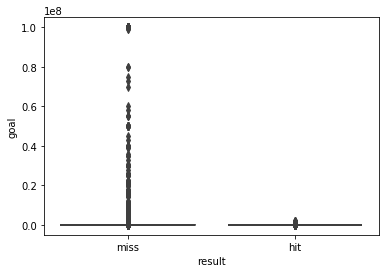

In [121]:
sns.boxplot(x='result', y='goal', data=df, notch=True)

/Users/anujgupta/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


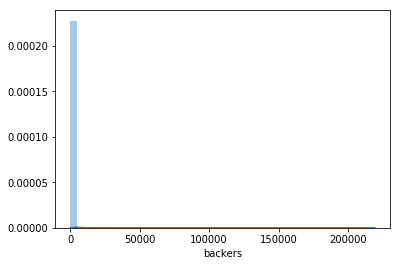

In [123]:
sns.distplot(df["backers"])

In [149]:
df.groupby("result").agg({"backers":['sum','mean','count', 'max', 'std', 'median']}).round(1)

backers                                      
             sum   mean   count     max     std median
result                                                
hit     35353850  263.9  133956  219382  1504.6     71
miss     4639369   19.0  244705   20632   114.3      3

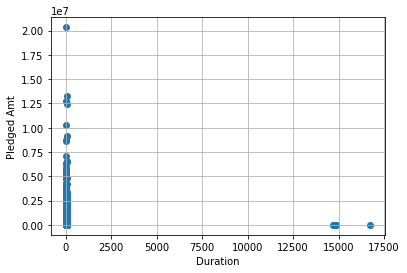

In [134]:
plt.scatter(x=df.duration, y=df.pledged_usd)
plt.grid(True)
plt.xlabel("Duration")
plt.ylabel("Pledged Amt")
plt.show()

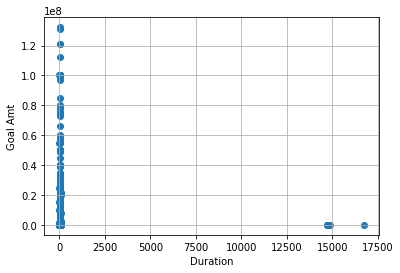

In [137]:
plt.scatter(x=df.duration, y=df.goal_usd)
plt.grid(True)
plt.xlabel("Duration")
plt.ylabel("Goal Amt")
plt.show()

In [142]:
df[["duration", "goal", "pledged", "backers"]].describe()

,duration,goal,pledged,backers
count,378661.000,3.787e+05,3.787e+05,378661.000
mean,33.481,4.908e+04,9.683e+03,105.617
std,65.909,1.183e+06,9.564e+04,907.185
min,0.000,1.000e-02,0.000e+00,0.000
25%,29.000,2.000e+03,3.000e+01,2.000
50%,29.000,5.200e+03,6.200e+02,12.000
75%,36.000,1.600e+04,4.076e+03,56.000
max,16738.000,1.000e+08,2.034e+07,219382.000


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 620463 to 698601
Data columns (total 18 columns):
Date             378661 non-null object
ID               378661 non-null int64
backers          378661 non-null int64
category         378661 non-null object
country          378661 non-null object
currency         378661 non-null object
deadline         378661 non-null datetime64[ns]
goal             378661 non-null float64
launched         378661 non-null datetime64[ns]
main_category    378661 non-null object
pledged          378661 non-null float64
state            378661 non-null object
duration         378661 non-null int64
Rate             378661 non-null float64
size             378661 non-null object
goal_usd         378661 non-null float64
pledged_usd      378661 non-null float64
result           378661 non-null object
dtypes: datetime64[ns](2), float64(5), int64(3), object(8)
memory usage: 64.9+ MB


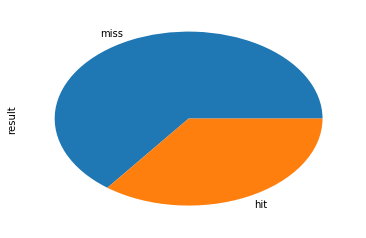

In [159]:
projDist = df["result"].value_counts()
projDist.plot(kind="pie")

In [ ]:
countryDist = df.groupby(["country", "result"], as_index=False)["result"].count()
countryDist
#countryDist.plot(kind="bar")

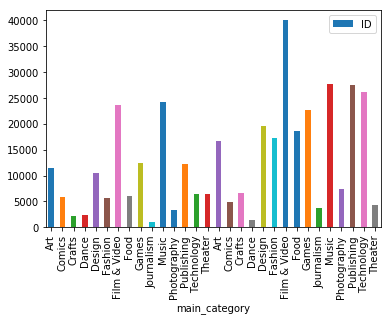

In [181]:
results_by_cat = df.groupby(["result", "main_category"], as_index=False)["ID"].count()
results_by_cat.plot(x="main_category", y="ID", kind="bar")

/Users/anujgupta/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


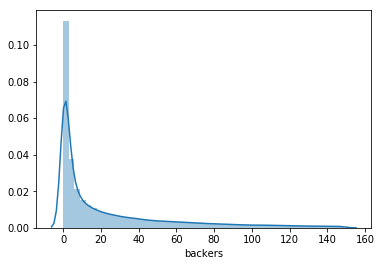

In [194]:
sns.distplot(df.backers[df.backers<150])

In [203]:
df.backers[df.backers<20].count()

217405

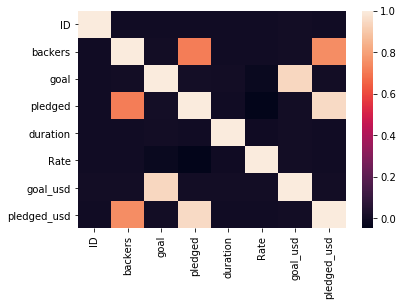

In [207]:
heat = df.corr()
sns.heatmap(heat)

AttributeError: Unknown property max

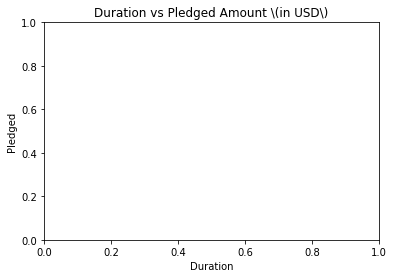

In [209]:
plt.xlabel("Duration")
plt.ylabel("Pledged")
plt.title("Duration vs Pledged Amount \(in USD\)")
plt.scatter(x="duration", y="pledged_usd", max=1000, data=df)

In [274]:
print("HITS::")
print("MEAN: ", df.loc[df.result=='hit'].mean())
print("MEDIAN: ", df.loc[df.result=='hit'].median())
print("STANDARD DEVIATION: ", df.loc[df.result=='hit'].std())

HITS::
MEAN:  ID             1.074e+09
backers        2.639e+02
goal           1.016e+04
pledged        2.410e+04
duration       3.116e+01
Rate           1.016e+00
goal_usd       9.497e+03
pledged_usd    2.264e+04
dtype: float64
MEDIAN:  ID             1.077e+09
backers        7.100e+01
goal           3.923e+03
pledged        5.117e+03
duration       2.900e+01
Rate           1.000e+00
goal_usd       3.812e+03
pledged_usd    5.091e+03
dtype: float64
STANDARD DEVIATION:  ID             6.192e+08
backers        1.505e+03
goal           3.125e+04
pledged        1.585e+05
duration       1.177e+01
Rate           1.574e-01
goal_usd       2.772e+04
pledged_usd    1.512e+05
dtype: float64


In [275]:
print("MEAN: ", df.loc[df.result=='hit', "pledged_usd"].mean())

MEAN:  22638.24659269718
